In [1]:
import pandas as pd
import openml
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np
import seaborn as sns

In [2]:
#Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing
df = pd.read_csv("bank\\bank.csv",delimiter=";")



In [3]:

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.shape


(4521, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

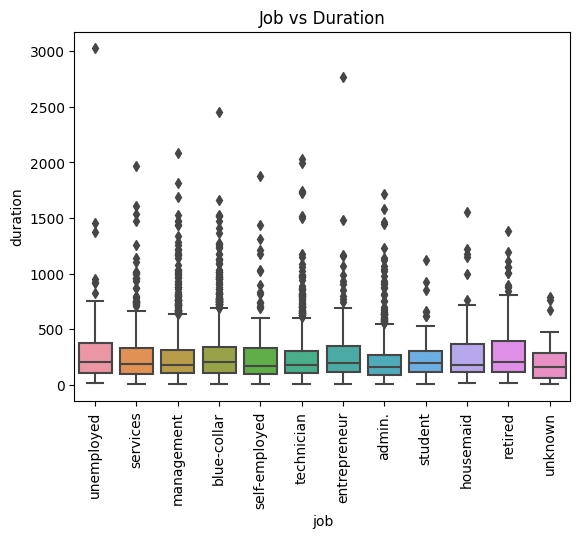

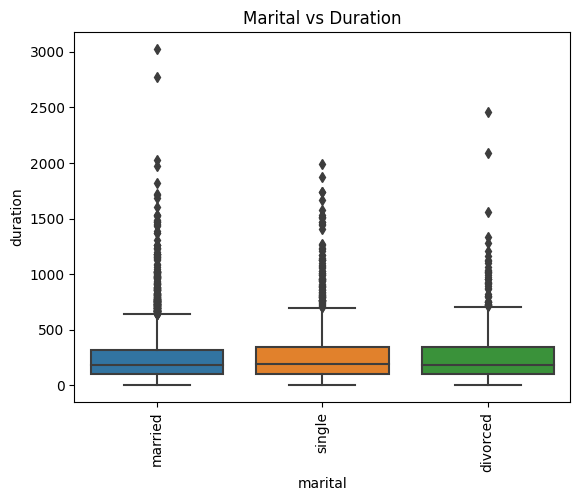

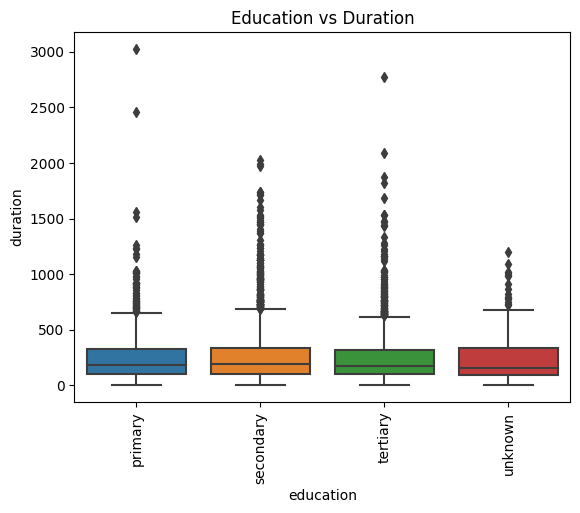

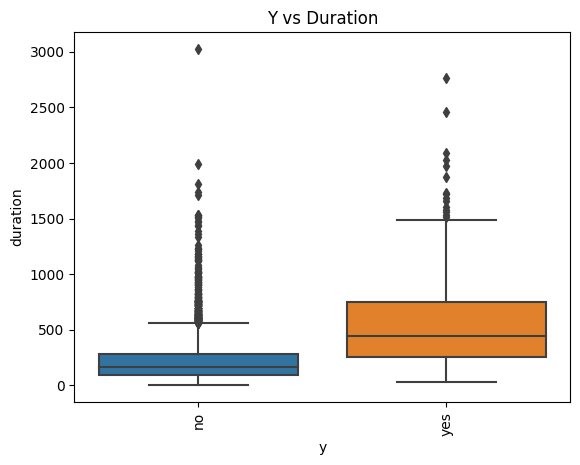

In [19]:

cat_cols = ["job","marital","education","y"]

#fig, axes = plt.subplots(2, 2, figsize=(15,15))
#for i,ax in enumerate(axes.ravel()):
for cat in cat_cols:
    sns.boxplot( x=cat,y="duration",data=df);
    plt.title(cat.capitalize()+  " vs Duration")
    plt.xticks(rotation = 90);
    plt.show();
    
    


In [ ]:

cat_cols = ["job","marital","education","y"]

fig, axes = plt.subplots(2, 2, figsize=(15,15))
for i,ax in enumerate(axes.ravel()):
    sns.boxplot(ax = ax, x=cat_cols[i],y="balance",data=df[df.balance < 10000]);
    plt.xticks(rotation = 90);
    
#Todo: remove outliers form balance
#todo: remove zero days form pdays


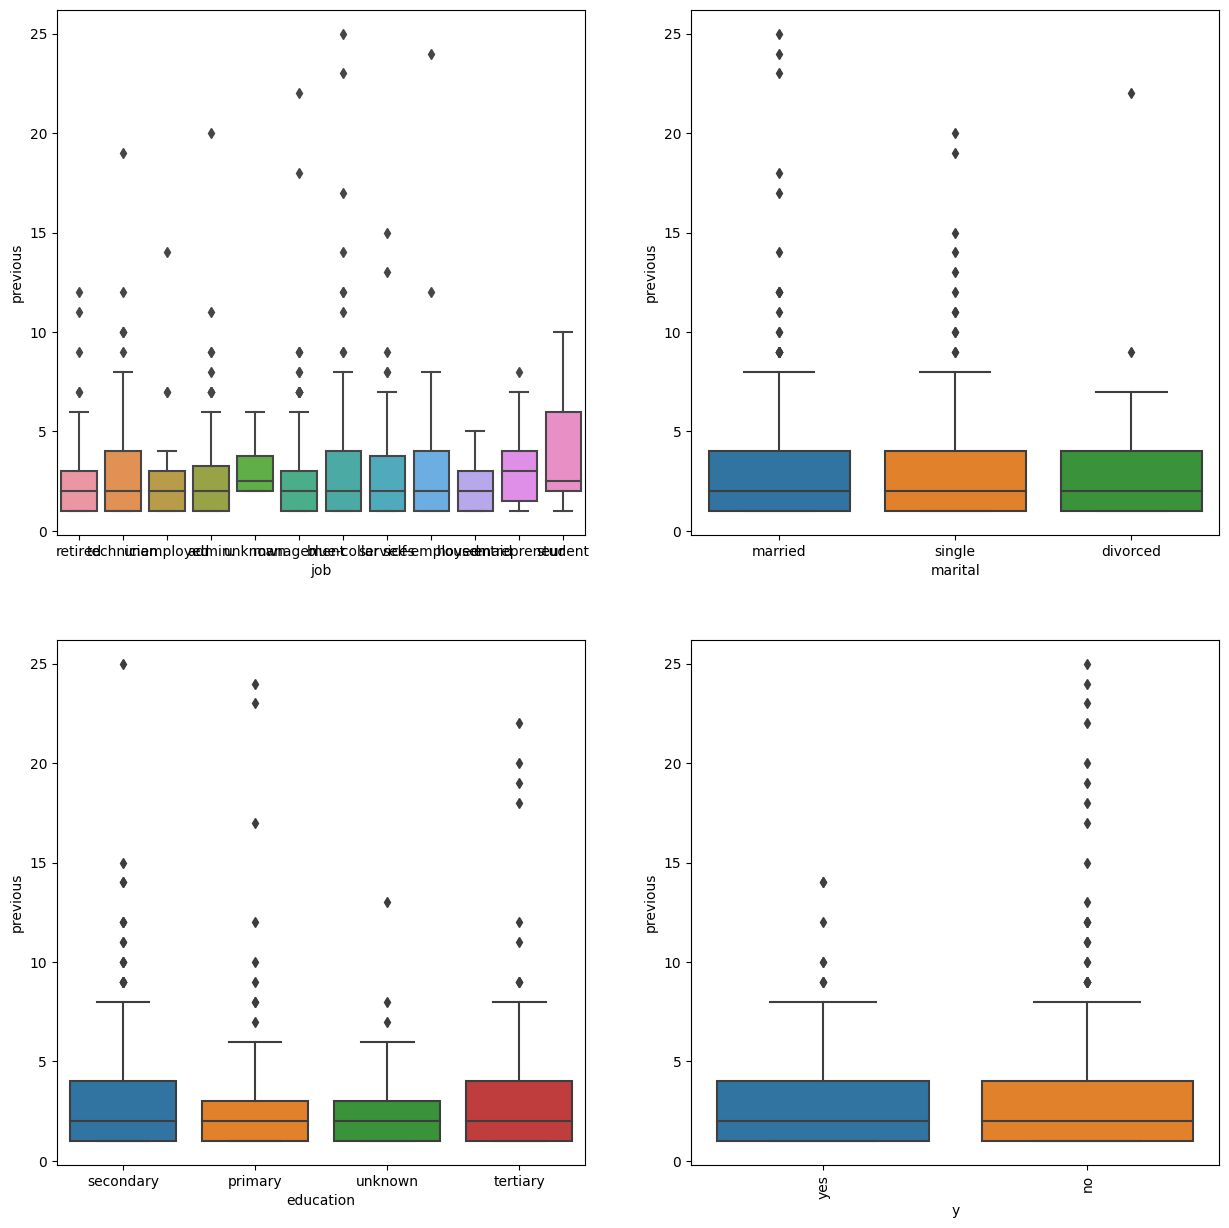

In [111]:




fig, axes = plt.subplots(2, 2, figsize=(15,15))
for i,ax in enumerate(axes.ravel()):
    sns.boxplot(ax = ax, x=cat_cols[i],y="previous",data=df[df.previous > 0]);
    plt.xticks(rotation = 90);

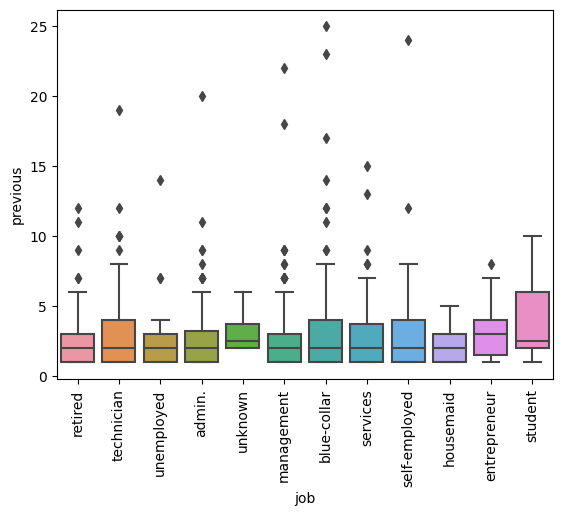

In [113]:
sns.boxplot( x="job",y="previous",data=df[df.previous > 0]);
plt.xticks(rotation = 90);

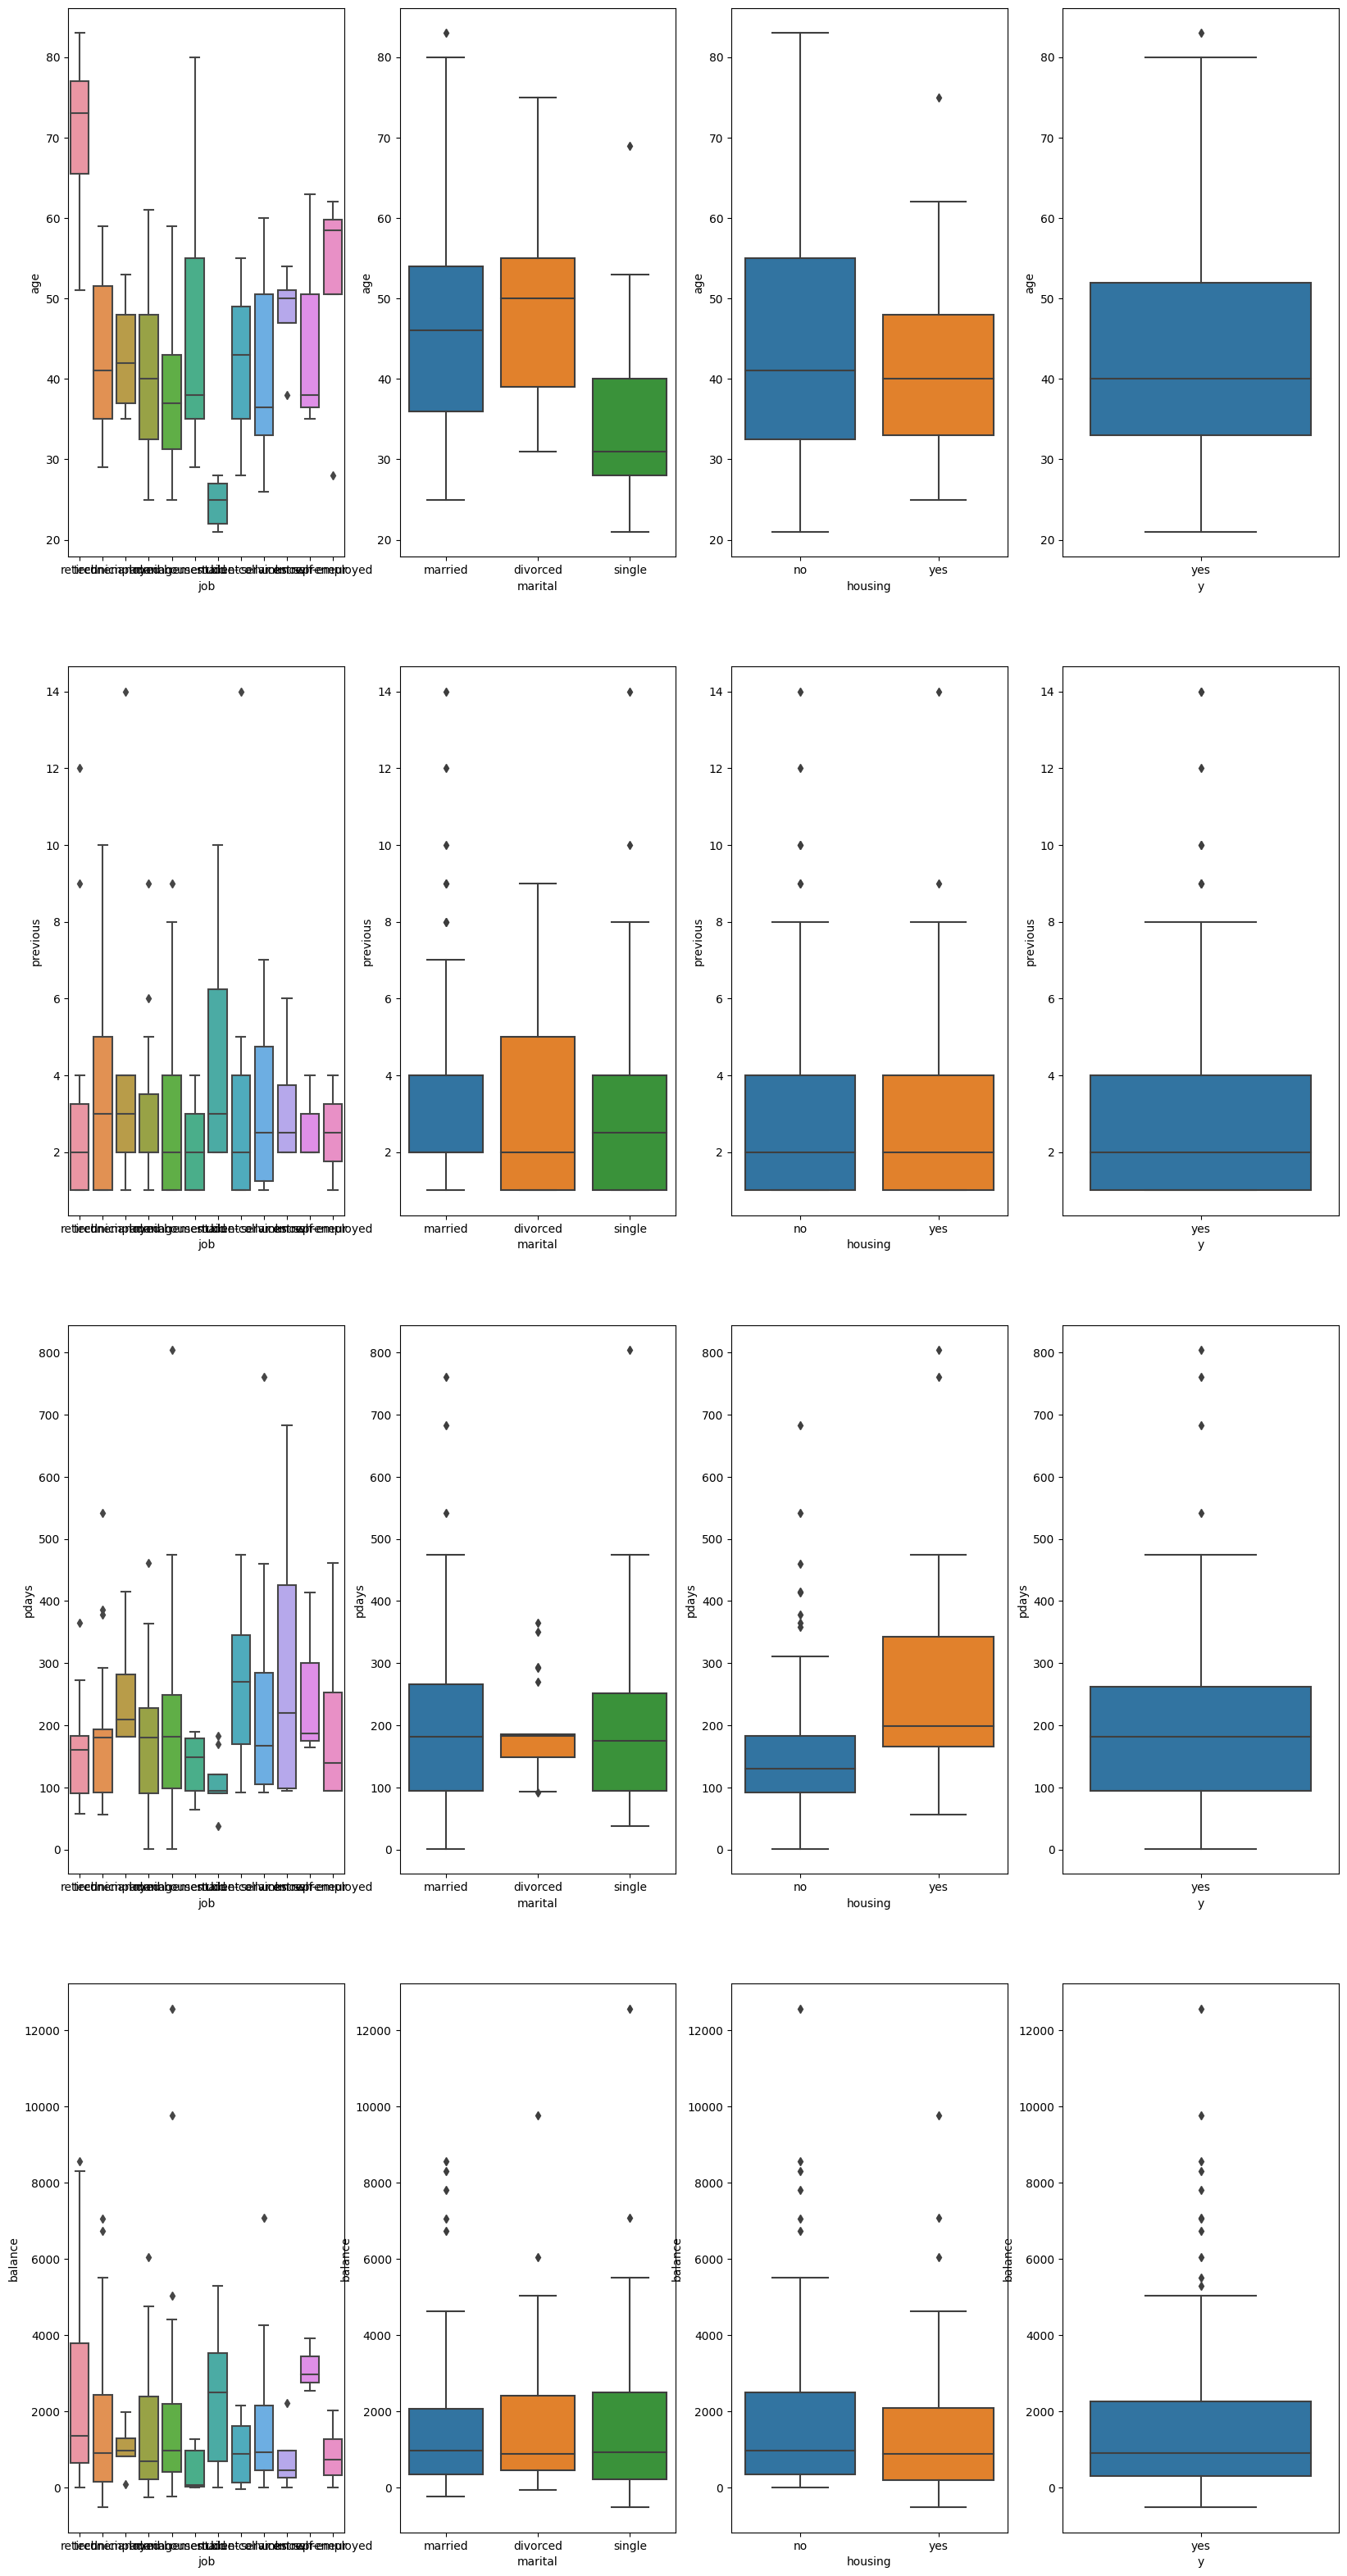

In [136]:

def display_boxplots(df):
    num_cols = ["age","previous","pdays","balance"]
    cat_cols = ["job","marital","housing","y"]
    
    fig, axes = plt.subplots(len(num_cols), len(cat_cols), figsize=(20,40))
    for i,ax in enumerate(axes.ravel()):
        row = i // 4
        col = i % 4
        #print(row,col)
        sns.boxplot(ax=ax, x=cat_cols[col],y=num_cols[row],data=df[df.previous > 0]);
        #plt.xticks(rotation = 90);
display_boxplots(df[df.y == "yes"])    

In [20]:
df.columns
#df.groupby("campaign").agg({"y":"value_count"})
df_yes = df[["campaign","y"]][df.y == "yes"].value_counts().reset_index()
df_yes.columns = ["campaign","y","yes_count"]
df_total = df[["campaign"]].value_counts().reset_index()
df_total.columns = ["campaign","total_count"]
df_merged = df_yes.merge(df_total, how="inner",on="campaign")


In [21]:
df_merged["percent"] = df_merged.yes_count/df_merged.total_count
#df[["campaign","y"]].sort_values(by="campaign").value_counts().reset_index()
df_merged

,campaign,y,yes_count,total_count,percent
0,1,yes,240,1734,0.138408
1,2,yes,138,1264,0.109177
2,3,yes,57,558,0.102151
3,4,yes,43,325,0.132308
4,6,yes,16,155,0.103226
5,5,yes,9,167,0.053892
6,7,yes,6,75,0.080000
7,8,yes,4,56,0.071429
8,9,yes,2,30,0.066667
9,13,yes,2,17,0.117647


In [169]:
#df[["campaign","housing"]].value_counts().reset_index()

,campaign,housing,0
0,1,yes,1022
1,1,no,712
2,2,yes,696
3,2,no,568
4,3,yes,316
5,3,no,242
6,4,yes,174
7,4,no,151
8,5,yes,97
9,6,no,81


In [175]:
df_dummy = pd.get_dummies(data=df,columns=["education","housing","loan","job","default","marital"])



In [188]:

len(df.columns)
len(df_dummy.columns)
sel_cols = ["campaign"] + df_dummy.columns[19:].to_list() 
df_dummy2 = df_dummy.groupby("campaign").sum().reset_index()[sel_cols]


C:\Users\Charles P\AppData\Local\Temp\ipykernel_16416\4209622622.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dummy2 = df_dummy.groupby("campaign").sum().reset_index()[sel_cols]


In [191]:
df_counts = df_merged.merge( df_dummy2,on="campaign",how="inner")

In [198]:
df_counts.sort_values(by="percent", ascending=False)[df_counts.total_count > 10]
#df_counts.loan_yes/df_counts.total_count
#Todo: why not include campaigns with yes = 0
#Todo: month, day,dayofweek

C:\Users\Charles P\AppData\Local\Temp\ipykernel_16416\2848265911.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_counts.sort_values(by="percent", ascending=False)[df_counts.total_count > 10]


,campaign,y,yes_count,total_count,percent,loan_no,loan_yes,job_admin.,job_blue-collar,job_entrepreneur,...,job_services,job_student,job_technician,job_unemployed,job_unknown,default_no,default_yes,marital_divorced,marital_married,marital_single
0,1,yes,240,1734,13.840830,1459,275,207,371,65,...,170,40,265,63,16,1705,29,222,1033,479
3,4,yes,43,325,13.230769,275,50,20,68,9,...,22,4,62,14,2,317,8,34,209,82
9,13,yes,2,17,11.764706,15,2,1,4,1,...,4,1,2,0,0,17,0,2,10,5
1,2,yes,138,1264,10.917722,1088,176,129,254,49,...,122,21,240,23,10,1245,19,139,790,335
4,6,yes,16,155,10.322581,129,26,18,30,2,...,14,3,28,2,2,151,4,21,90,44
2,3,yes,57,558,10.215054,477,81,50,116,28,...,40,10,94,18,4,548,10,61,363,134
6,7,yes,6,75,8.000000,63,12,14,15,3,...,7,0,9,2,1,73,2,6,54,15
7,8,yes,4,56,7.142857,46,10,5,9,4,...,3,0,14,2,1,55,1,8,34,14
8,9,yes,2,30,6.666667,25,5,4,10,0,...,4,1,3,0,1,30,0,3,21,6
5,5,yes,9,167,5.389222,141,26,16,39,3,...,15,3,32,1,1,164,3,20,106,41


<AxesSubplot: ylabel='percent'>

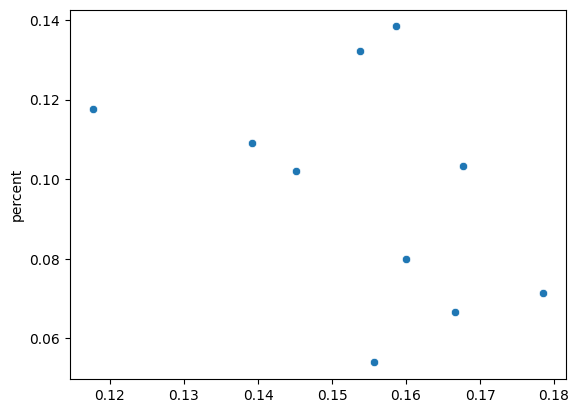

In [218]:
#df_counts.loc[:,df_counts.columns.str.startswith("loan_")]
pct_yes_loan  = df_counts["loan_yes"]/df_counts["total_count"]
#df_counts["percent"] = df_counts["percent"]/100
df_counts["percent"][:10]
sns.scatterplot(x=pct_yes_loan,y=df_counts["percent"][:10],data=df_counts )


In [242]:
select_cols = df_counts.columns[np.array(df_counts.columns.str.startswith("marital_")).tolist()].tolist() + ["percent"]

select_cols
df_counts[select_cols].corr()

#Todo: unemployed correlation 


,marital_divorced,marital_married,marital_single,percent
marital_divorced,1.000000,0.992703,0.998146,0.069210
marital_married,0.992703,1.000000,0.997234,0.064917
marital_single,0.998146,0.997234,1.000000,0.072541
percent,0.069210,0.064917,0.072541,1.000000


<AxesSubplot: xlabel='y', ylabel='duration'>

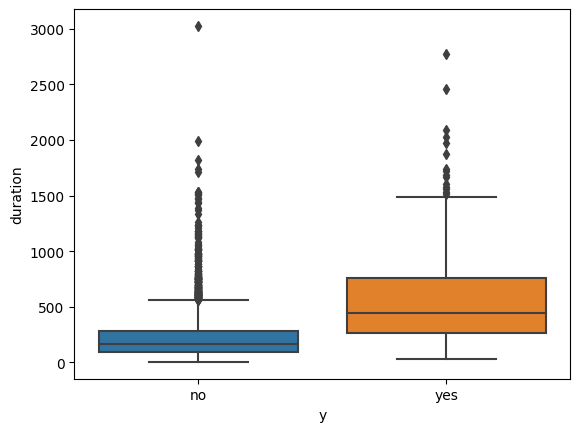

In [245]:
#Todo: Include this graph
sns.boxplot(x="y",y="duration",data=df)

In [251]:
d ={}
d["duration"] = ["max","median","min","count","mean","sum"]
df.groupby("month").agg(d)
#Todo: include


duration                                     
           max median min count        mean     sum
month                                              
apr       1472  224.0   5   293  294.354949   86246
aug       1877  159.0   5   633  243.742496  154289
dec       1370  317.5  69    20  416.900000    8338
feb       1971  176.0   8   222  255.698198   56765
jan       3025  181.5  24   148  269.540541   39892
jul       2029  186.5   5   706  271.205382  191471
jun       2769  163.0   5   531  252.425612  134038
mar        910  164.0  30    49  198.897959    9746
may       2087  198.0   4  1398  267.316166  373708
nov       1816  183.0   6   389  272.066838  105834
oct       1386  223.0   5    80  272.800000   21824
sep        595  184.5   9    52  215.730769   11218

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, '(duration, max)'),
  Text(2, 0, '(duration, median)'),
  Text(3, 0, '(duration, min)'),
  Text(4, 0, '(duration, count)'),
  Text(5, 0, '(duration, mean)')])

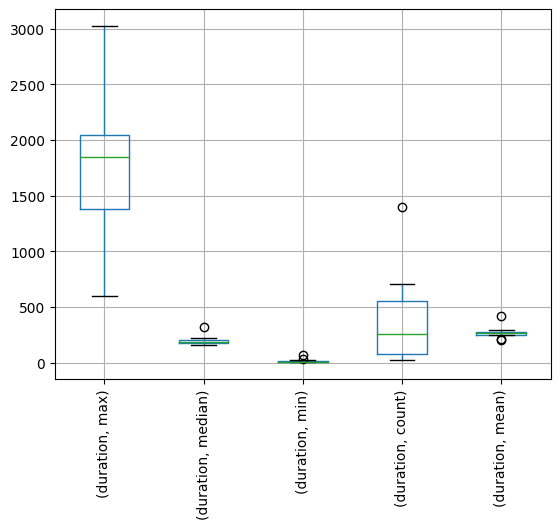

In [255]:
d ={}
d["duration"] = ["max","median","min","count","mean"]
df.groupby("month").agg(d).boxplot()
plt.xticks(rotation = 90)


<AxesSubplot: xlabel='month', ylabel='duration'>

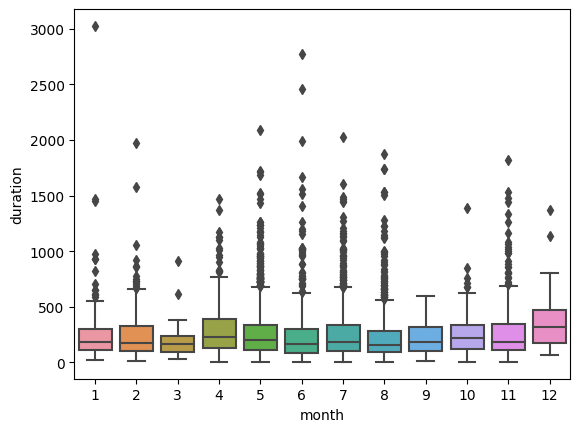

In [262]:
sns.boxplot(x="month", y="duration", data= df.sort_values(by="month"))
#Todo: include

In [264]:
df[df.y=="yes"].groupby(["month","y"])["duration"].sum().reset_index()

,month,y,duration
0,1,yes,8360
1,2,yes,17135
2,3,yes,5248
3,4,yes,24710
4,5,yes,63990
5,6,yes,35210
6,7,yes,45193
7,8,yes,45562
8,9,yes,5019
9,10,yes,12567


In [260]:

day_month = pd.to_datetime(df["month"] + "/"  +df["day"].astype(str) + "/2022" )
df["month"] = day_month.dt.month


In [84]:
df.month.unique()

array([10,  5,  4,  6,  2,  8,  1,  7, 11,  9,  3, 12], dtype=int64)

In [85]:

df_temp = df.sort_values(["campaign","month","day"]).reset_index().reset_index()
cols = df_temp.columns.tolist() #[0] = ["chrono_order"] #,"orig_order"]
cols[:2] = ["chrono_order","orig_order"]
df_temp.columns = cols
df = df_temp
#df["chrono_order"] = np.arange(df.sort_values(["campaign","month","day"]).shape[0])
#reset_index(drop=True)



<AxesSubplot: xlabel='chrono_order'>

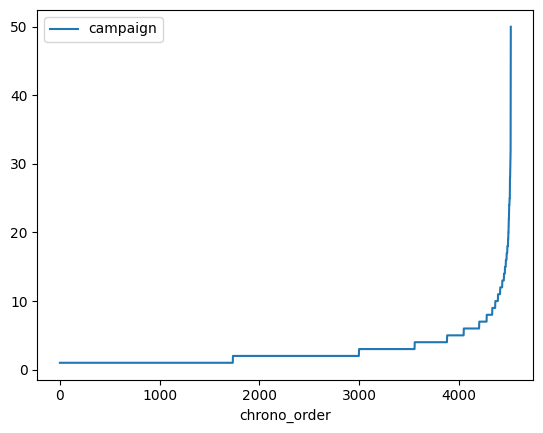

In [86]:
#campaigns over time
df.plot(x ="chrono_order",y ="campaign", kind="line")


In [87]:
d= {}
d["duration"]  = ["sum","count"]
df_camp = df.groupby(["campaign","month","day"]).agg(d).reset_index()
#df_camp[df_camp["campaign"] == 3]   .plot(x="day",y="duration")

x = []
df_camp.columns = ["campaign","month","day","duration","count"]


In [75]:
df_camp

,campaign,month,day,duration,count
0,1,10,1,3022,17
1,1,10,2,11926,58
2,1,10,3,8946,39
3,1,10,4,13623,55
4,1,10,5,25189,93
...,...,...,...,...,...
360,31,10,28,33,1
361,32,10,2,29,1
362,32,10,16,192,1
363,44,10,31,18,1


<AxesSubplot: xlabel='day', ylabel='count'>

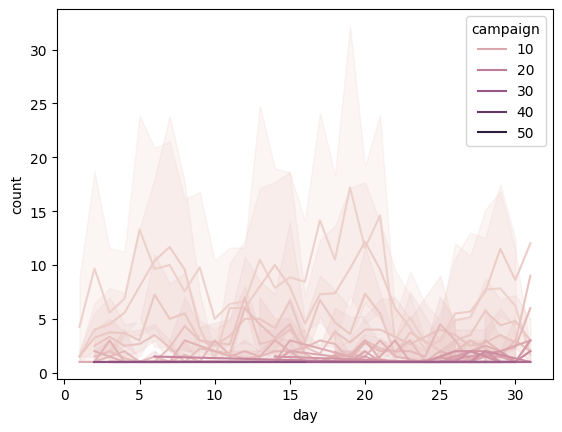

In [92]:
sns.lineplot(data=df_camp, x="day", y="count",hue="campaign")

In [76]:
d= {}
d["duration"]  = ["sum","count"]
df_camp = df.groupby(["campaign","month"]).agg(d).reset_index()
#df_camp[df_camp["campaign"] == 3]   .plot(x="day",y="duration")

x = []

df_camp.columns = ["campaign","month","duration","count"]



In [79]:
df.month.unique()

array([10], dtype=int64)

<AxesSubplot: xlabel='month', ylabel='count'>

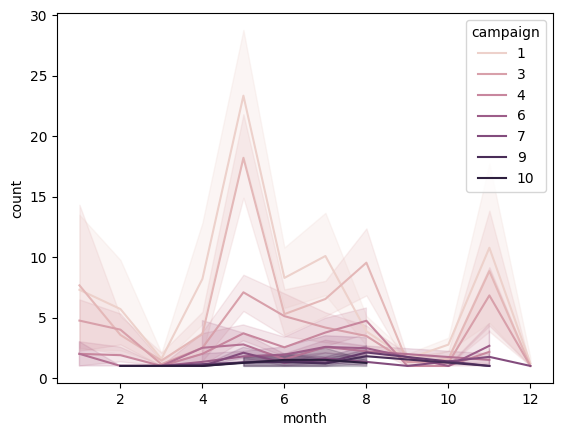

In [90]:
sns.lineplot(data=df_camp[df_camp.campaign < 11], x="month", y="count",hue="campaign")

In [ ]:
df  

In [ ]:

a = {}
a["age"] = ["mean","median"]
a["balance"] = ["mean","median"]
df.groupby("job").agg(a)


<AxesSubplot: >

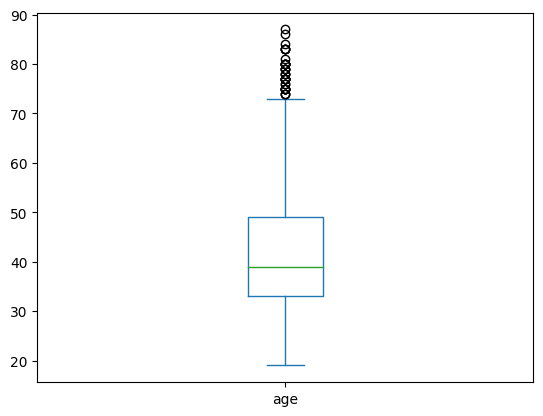

In [20]:

df["age"].sort_values().to_frame().reset_index(drop=True).plot(kind="box")


In [36]:
df["purpose"].value_counts()

radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
vacation                 0
Name: purpose, dtype: int64

<AxesSubplot: >

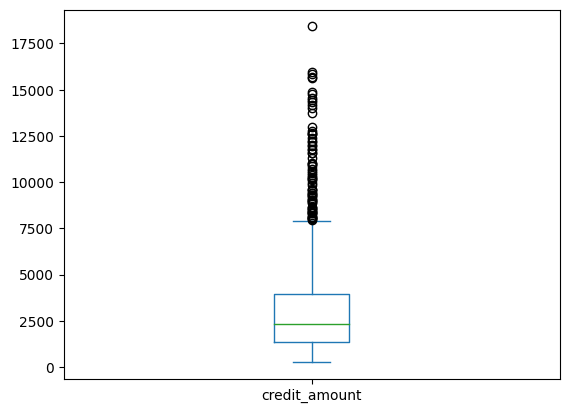

In [40]:
df["credit_amount"].plot(kind="box")



In [25]:
#EDA
mask = df.y == "yes"
df[mask]["loan"].value_counts(normalize=True)*100


no     91.746641
yes     8.253359
Name: loan, dtype: float64

In [31]:

vc = df[["y","loan","job","marital","education"]].value_counts().to_frame()


In [35]:
import seaborn as sns


<AxesSubplot: xlabel='education', ylabel='age'>

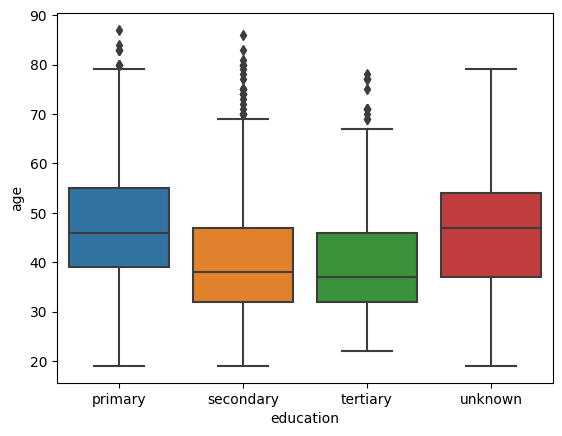

In [37]:

sns.boxplot(x="education",y ="age",data=df)


<AxesSubplot: >

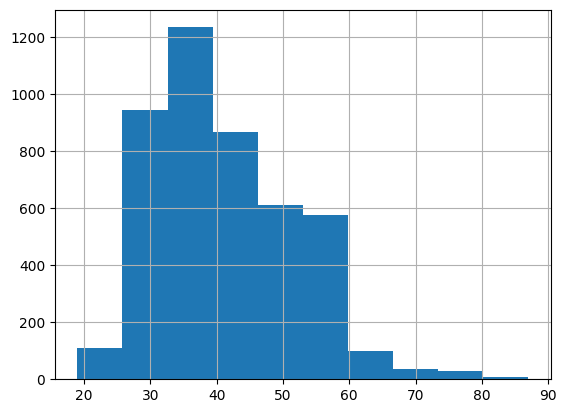

In [38]:
df["age"].hist()